In [156]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage.filters import correlate 
import matplotlib.pyplot as plt
import matplotlib.image as pltimg 


In [157]:
def load_image(path, mode=cv2.IMREAD_GRAYSCALE):
    '''
    :param path: image path
    :param mode: load mode, cv2.IMREAD_GRAYSCALE, cv2.IMREAD_COLOR
    :return: loaded img
    '''
    img = cv2.imread(path,mode)
    return img


In [158]:

def normalize(img):
    ''' Function to normalize an input array to 0-1 '''
    img_min = img.min()
    img_max = img.max()
    return (img - img_min) / (img_max - img_min)

def generate_gaussian_kernel(rows, cols, sigma, highPass=True):
    '''
    :param rows: rows of gaussian kernel
    :param cols: cols of gaussian kernel
    :param sigma: sigma
    :param highPass: if this kernel is in highpass mode
    :return: 
    '''
    center_row = int(rows/2) + 1 if rows % 2 == 1 else int(rows/2)
    center_col = int(cols/2) + 1 if cols % 2 == 1 else int(cols/2)
    def gaussian_at_pos(i,j):  
        coefficient = math.exp(-1.0 * ((i - center_row)**2 + (j - center_col)**2) / (2 * sigma**2))
        return 1 - coefficient if highPass else coefficient
    
    return np.array([[gaussian_at_pos(i, j) for j in range(cols)] for i in range(rows)])



In [162]:
# from https://github.com/Yeema/Image-Filtering-and-Hybrid-Images/blob/master/code/my_imfilter.py
def my_imfilter(image, imfilter):

    '''
    Input:
        image: A 3d array represent the input image.
        imfilter: The gaussian filter.
    Output:
        output: The filtered image.
    '''
    ###################################################################################
    # TODO:                                                                           #
    # This function is intended to behave like the scipy.ndimage.filters.correlate    #
    # (2-D correlation is related to 2-D convolution by a 180 degree rotation         #
    # of the filter matrix.)                                                          #
    # Your function should work for color images. Simply filter each color            #
    # channel independently.                                                          #
    # Your function should work for filters of any width and height                   #
    # combination, as long as the width and height are odd (e.g. 1, 7, 9). This       #
    # restriction makes it unambigious which pixel in the filter is the center        #
    # pixel.                                                                          #
    # Boundary handling can be tricky. The filter can't be centered on pixels         #
    # at the image boundary without parts of the filter being out of bounds. You      #
    # should simply recreate the default behavior of scipy.signal.convolve2d --       #
    # pad the input image with zeros, and return a filtered image which matches the   #
    # input resolution. A better approach is to mirror the image content over the     #
    # boundaries for padding.                                                         #
    # Uncomment if you want to simply call scipy.ndimage.filters.correlate so you can # 
    # see the desired behavior.                                                       #
    # When you write your actual solution, you can't use the convolution functions    #
    # from numpy scipy ... etc. (e.g. numpy.convolve, scipy.signal)                   #
    # Simply loop over all the pixels and do the actual computation.                  #
    # It might be slow.                                                               #
    ###################################################################################
    ###################################################################################
    # NOTE:                                                                           #
    # Some useful functions                                                           #
    #     numpy.pad or numpy.lib.pad                                                  #
    # #################################################################################
    
    # Uncomment if you want to simply call scipy.ndimage.filters.correlate so you can 
    # see the desired behavior.
    '''
    import scipy.ndimage as ndimage
    output = np.zeros_like(image)
    for ch in range(image.shape[2]):
        output[:,:,ch] = ndimage.filters.correlate(image[:,:,ch], imfilter, mode='constant')
    return output
    '''
    ###################################################################################
    #                                 END OF YOUR CODE                                #
    ###################################################################################
    #print(imfilter)
    
    output = image.copy()
    im_dim=image.shape
    flt_dim=imfilter.shape
    img_dim1=im_dim[0]
    img_dim2=im_dim[1]
    flt_dim1=flt_dim[0]
    flt_dim2=flt_dim[1]
    pad_dim1=int((flt_dim1-1)/2)
    pad_dim2=int((flt_dim2-1)/2)
    pad_mat=np.zeros((img_dim1+2*pad_dim1,img_dim2+2*pad_dim2,3))
    pad_mat[pad_dim1: img_dim1 + pad_dim1, pad_dim2: img_dim2 + pad_dim2] = image
    #print(imfilter_180)
    for d in range(len(image[0][0])):
        for i in range(len(image)):
            for j in range(len(image[0])):
                output[i][j][d] = sum(sum(np.multiply(imfilter,pad_mat[i:i+flt_dim1,j:j+flt_dim2,d])))
                 
    return output

In [163]:
def generated_hybrid_image(image1, image2, sigma1 ,sigma2):
    '''
    :param image1: high_frequency_image
    :param image2: low_frequency
    :param sigma1: 
    :param sigma2: 
    :return: 
    '''
   
    high_pass_filter = generate_gaussian_kernel(sigma1*4+1, sigma1*4+1, sigma1)
    high_pass = image1 - my_imfilter(image1, high_pass_filter)
    
    low_pass_filter = generate_gaussian_kernel(sigma2*4+1, sigma2*4+1, sigma2)
    low_pass = my_imfilter(image2, low_pass_filter)
    
    hybrid_img = (low_pass + high_pass)
    return hybrid_img

(460, 345, 3)
(460, 345, 3)


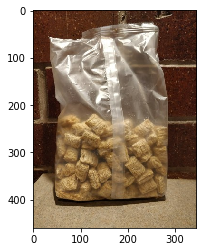

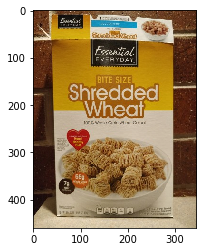

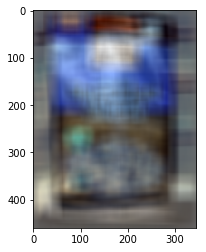

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [165]:
if __name__ == '__main__':
    
    # load image
    PATH_C_1 = "data\\part1\\c1.jpg"
    PATH_C_2 = "data\\part1\\c2.jpg"
    high_frequency = pltimg.imread(PATH_C_1)
    low_frequency = pltimg.imread(PATH_C_2)
    high_frequency = high_frequency.astype(np.single)/255 
    low_frequency = low_frequency.astype(np.single)/255
    print(high_frequency.shape)
    print(low_frequency.shape)
    
    sigma1 = 7
    sigma2 = 7
    hybrid_img = generated_hybrid_image(high_frequency, low_frequency, sigma1, sigma2)
    
    ''' Visualize and save outputs '''
    plt.figure(1)
    plt.imshow(normalize(low_frequency), cmap='gray')
    plt.figure(2)
    plt.imshow(normalize(high_frequency+0.5), cmap='gray')
    plt.figure(3)
    plt.imshow(normalize(hybrid_img), cmap='gray')
    plt.show()
    plt.imsave("hybrid_c.png", hybrid_img, dpi=100)